# Chaine de Markov

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=3,suppress=True)

Attention, lorsqu'on part d'une matrice symétrique (ou hermitienne), pour obtenir la diagonalisation dans une base othornormale il faut utiliser `np.linalg.eigh` (h-comme hermitienne). Vérifiez-le!


## Définition intuitive d'une chaine de Markov

***NB:*** Le mot "chaine de Markov" (tout court) est pour nous synonime de "chaine de Markov homogène en temps". 

On considère un ensemble dénombrable $E$ : l'ensemble des "états". Par exemple   $E=\{0,1,2,3,4,5\}$.      On considère aussi que les éléments de $E$ sont des sommets d'un graphe, dont les flèches sont pondérées.  

![graph_ponder](./img/graph_ponder.png)

Une chaine de Markov $t\to X_t$  est un processus aléatoire qui se ballade en suivant le graphe. Au temps $t=0$ elle se trouve en une sommet $X_0$ donné.  Si au temps $t$ elle se trouve en $X_t$, elle tire une des flèches partant de $X_t$,  avec une probabilité proportionnelle aux pondérations, et elle suit cette flèche pour arriver à un nouvel état $X_{t+1}$

Notations:

* Le poids mis sur la fléche allant de $x$ à $y$ est noté $P(x,y)$. 
* Quand il n'y a pas de flèche entre $x$ et $y$, on note $P(x,y)=0$.  
* La matrice $\big ( P(x,y) \big)_{x,y \in E}$ est appelée matrice de transition.


***Remarques:*** Ici, les étiquettes que l'on a mises sur les états n'ont aucune importance. On aurait pu tout aussi bien prendre $E=\{A,B,C,E,D,F\}$. Dans les exemples suivants, le fait que les indexes soient des entiers aura son importance.   

In [21]:
def premier_chaine():
    P=np.zeros([6,6])
    P[0,3]=4
    P[1,0]=2.1
    P[2,1]=2.5
    P[3,1]=3
    P[3,4]=2
    P[4,1]=2
    P[4,2]=0.2
    P[4,5]=6
    P[5,2]=7.3
    sumLine=np.sum(P,axis=1)
    """ P[i,j]=P[i,j]/sumLine[i] """
    P/=np.expand_dims(sumLine,axis=1)
    return P

print(premier_chaine())

[[0.    0.    0.    1.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.   ]
 [0.    0.6   0.    0.    0.4   0.   ]
 [0.    0.244 0.024 0.    0.    0.732]
 [0.    0.    1.    0.    0.    0.   ]]


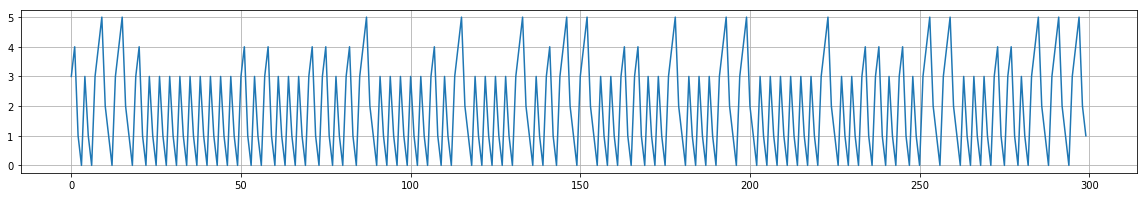

In [22]:
def markov_from_P(t_max,P,x0):
    X=np.zeros(t_max,dtype=np.int)
    X[0]=x0
    for t in range(t_max-1):
        X[t+1]=np.random.choice(a=range(len(P)),p=P[X[t],:])
    return X


t_max=300
P=premier_chaine()
X=markov_from_P(t_max,P,3)
plt.figure(figsize=(20,3))
plt.plot(range(t_max),X);
plt.grid()



## Exemples: Marches aléatoires

Les marches aléatoire sont des chaines de Markov (homogène en temps) qui possèdent en plus une certaine homogénéité en espace.  Donnons des exemples :


* La marche aléatoire simple sur $E=\mathbb Z$: elle monte de 1 ou descend de 1 avec proba $\frac 12$.   

* Les marches aléatoires non-simples: elles montent et descendent selon une loi donnée (pas forcément portée par {-1,+1}). Par exemple les sauts possibles sont {+1,+2,-1} avec proba {1/3,1/3,1/3}; quelle sera d'après vous la destination d'une telle marche aléatoire?


* La marche aléatoire simple absorbée sur $E=\{0,1,...,n-1\}$. Elle monte ou descend avec proba $\frac 12$. Une fois arrivée en $0$ ou en $n-1$, elle reste dans ces états. 

*  La marche aléatoire simple réfléchie sur $E=\{0,1,...,n-1\}$. Elle monte ou descend avec proba $\frac 12$. Une fois arrivée en $0$ elle monte en 1,  une fois arrivée en $n-1$ elle descend en $n-2$.  



***A vous:*** Simulez ces marches aléatoires. Pour les marches sur $E=\{0,1,...,n-1\}$, utilisez la technique précédente qui utilise `np.random.choice`. Pour les marches sur $\mathbb Z$, inventez une technique.  


***Généralisation:*** On peut aussi imaginez des marches aléatoire sur $\mathbb R$ (par exemple avec des sauts gaussiens). Mais cela sort du cadre classique. 


## Définition formelle d'une chaine de Markov

***Définition:*** Une chaine de Markov générale sur $E$ est une fonction  aléatoire (=un processus) $t \to X_t$ qui prend en $t=0$ une valeur $X_0$ donnée (possiblement aléatoire) et qui ensuite est régie par l'équation:

$$
X_{t+1} = f_{t+1} (X_t, U_{t+1})   
$$
avec 

* f_{t+1} fonction à valeur dans $E$
* U_{t+1} v.a indépendante de tous les tirages aléatoires précédents, à savoir $X_0, U_1,U_2,...,U_t$. 

Si de plus, les $f_t$ ne dépendent pas du temps $t$, on parle d'une chaine de Markov homogène dans le temps. Pour le commun des mortels, le terme "chaines de Markov" sous-entend  "homogène dans le temps". 

La matrice de transition est définie par 
$$
P_{t+1}(x,y) = \mathbf P[X_{t+1} = y / X_t = x] 
$$
et dans le cas homogène en temps: $\forall t: P_t= P_0$. 




### Propriété fondamentale


***Théorème:***  Considérons $t\to X_t$ une chaine de Markov générale.  La loi  de $X_{t+1}$ est indépendante de $X_{0},...,X_{t-1}$ sachant $X_t$:

$$
\mathbf P[X_{t+1} = x_{t+1} /X_t = x_t ,  X_{t-1}=x_{t-1} ,..., X_{0}=x_0  ] =    \mathbf P[X_{t+1} = x_{t+1} /X_t = x_t   ]  
$$

Si de plus elle est homogène alors

$$
\mathbf P[X_{t+1} = y /X_t = x   ] = \mathbf P[X_{1} = y /X_0 = x   ] 
$$


Ce théorème admet une réciproque: si un processus $(X_t)$ satisfait la première équation alors c'est une chaine de Markov générale. Si en plus elle satistait la seconde équation, c'est une chaine de Markov homogène en temps. 


Attention: classiquement, on utilise la propriété d'indépendance conditionnelle pour définir une chaine de Markov. La définition que j'ai choisi est plus proche de la pratique: les chaines de Markov étant toujours construites à l'aide d'une équation $X_{t+1} = f_{t+1} (X_t, U_{t+1}) $ plus ou moins cachée. Par exemple, dans le programme précédent:

    X[t+1]=np.random.choice(a=range(6),p=P[X[t],:])
          = fonction(X[t], rand() )
          
où la fonction `rand()` symbolise l'appel du générateur aléatoire de notre ordinateur. Chaque appel donnant un réel aléatoire uniforme sur `[0,1]` indépendant de tous les tirages précédents. 




## Mesure invariante

On appelle mesure invariante un vecteur (ligne) $\pi$ sur $E$ vérifiant $\pi P=\pi$:
$$
\forall y\in E :  \sum_x \pi(x) P(x,y) = \pi(y)
$$
Si de plus $\pi$ vérifie $\sum_{x\in E} \pi(x)=1$ alors on parle de probabilité invariante.

***Théorème:*** Il existe toujours une mesure invariante. 

***Corrolaire:*** Quand $E$ est fini, il existe toujours une probabilité invariante: il suffit de renormaliser une mesure invariante $\pi$, en la divisant par sa masse totale $\sum_x \pi(x)$. 

***A vous:***

* Reconsidérons la marche aléatoire simple sur $\mathbb Z$. Donnez une mesure invariante (essayez de résoudre le système avec un $\pi$ très très simple). Peut-on la renormaliser pour en faire une proba invariante?  Qu'en est-il de la marche aléatoire non-simple?

* Plaçons nous dans le cas $E$ fini.  Trouvez l'argument d'algèbre linéaire qui permet d'établir  l'existence d'une mesure invariante. Aide: il y a un vecteur propre à droite très facile à trouver pour $P$...

val_pr
 [ 1.    -0.461 -0.461 -0.706  0.313  0.313]
vec_pr
 [[ 0.25   0.26   0.26  -0.403 -0.171 -0.171]
 [ 0.25   0.278  0.278  0.284  0.139  0.139]
 [ 0.076 -0.184 -0.184 -0.464  0.527  0.527]
 [ 0.25  -0.564 -0.564  0.57  -0.544 -0.544]
 [ 0.1    0.113  0.113 -0.323 -0.151 -0.151]
 [ 0.073  0.097  0.097  0.335  0.199  0.199]]


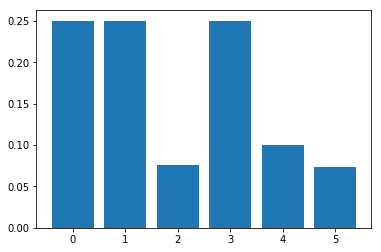

In [29]:
""" calculons l'unique probabilité invariante de notre chaine de Markov"""
def mesure_invariante(P):
    val_pr,vec_pr=np.linalg.eig(P.T)
    val_pr=np.real(val_pr)
    vec_pr=np.real(vec_pr)
    pi=vec_pr[:,0]
    pi/=np.sum(pi)
    print("val_pr\n",val_pr)
    print("vec_pr\n",vec_pr)
    return pi

P=premier_chaine()
pi=mesure_invariante(P)
plt.bar(range(6),pi);

***A vous:*** Pourquoi transpose-t-on la matrice dans `np.linalg.eig(P.T)`?

## Théorème ergodique

***NB:*** A partir de maintenant, nous supposons que l'espace d'état $E$ est fini. Dans une dernière partie, nous verrons les difficultés qui se rajoutent dans le cas infini. Notamment on introduira la dichotomie transient/récurrent.



On dit qu'un graphe est ***irréductible*** lorsque l'on peut toujours aller d'un état à l'autre en suivant les flèches. On dit qu'une chaine de Markov est irréductible quand son graphe l'est. 


***Théorème:*** Lorsqu'une chaine de Markov finie est irréductible, il n'y a qu'une seule mesure invariante, à une constante multiplicative près. Donc il y a une unique probabilité invariante. 

***A vous:*** Comment traduiriez-vous ce théorème en terme d'algèbre linéaire?

Notons maintenant $X^x_t$ la chaine de Markov qui part du point $x$. Notons:

$$
  \Gamma_{T}^x(y) =\frac 1 T  \sum_{t=0}^{T-1}  1_{\{X^x_t = y  \}}
$$
C'est le temps moyen passé dans l'état $y$ en partant de $x$.  


***Théorème (ergodique):*** Quand $T$ tend vers l'infini: 

* $\Gamma_{T}^x$ converge vers une probabilité invariante. 
* Quand la chaine est irréductible, il converge donc vers l'unique probabilité invariante, et par conséquent, la limite ne dépend pas du point de départ $x$.


[0.251 0.251 0.075 0.252 0.099 0.072]


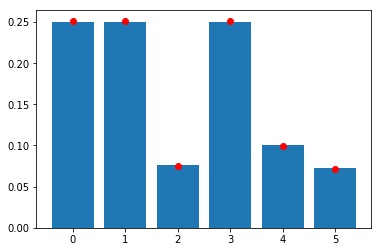

In [30]:
t_max=5000
P=premier_chaine()
X=markov_from_P(t_max,P,3)
Gamma=np.zeros(6)
for i in range(6):
    Gamma[i]=np.mean(X==i)
print(Gamma)
plt.bar(range(6),pi)
plt.plot(range(6),Gamma,"o",c="red");

***A vous:*** modifiez ce programme pour mettre en évidence la convergence: vous pouvez effectuer des moyennes à différents temps, et les afficher comme des petits points qui se rapprochent des points rouges ci-dessus. Attention il y a une erreur à ne pas faire (la même erreur que l'on fait souvent quand on veut illustrer la loi forte des grands nombres).

### Marche aléatoire absorbée: un exemple réductible


***Définition:*** Un état absorbant est un état duquel la chaine ne peut pas sortir. Par exemple, la marche aléatoire absorbée admet deux points absorbant: $0$ et $n-1$. 

***Exo:*** Considérons la marche absorbée. 

*   Montrez mathématiquement qu'il n'y a pas unicité de la probabilité invariante. 
*   Notons $\Gamma_\infty^x =\lim_T\Gamma_T^x$. Quelle est son interprétation probabiliste. Intuitez qu'elle dépend de $x$. Est-ce en constradiction avec le théorème ergodique?
*   A l'aide de simulations, tracez les courbes $x \to  \Gamma_\infty^x (0)$ et $x \to  \Gamma_\infty^x (n-1)$. Est-ce en accord avec votre intuition.  Aide: vous devez simuler la marche aléatoire jusqu'à ce qu'elle touche $0$ ou $n-1$. Il faut donc utiliser une boucle `while` (ou un `for...break`). Il ne faut donc par recopier le programme ci-dessous!

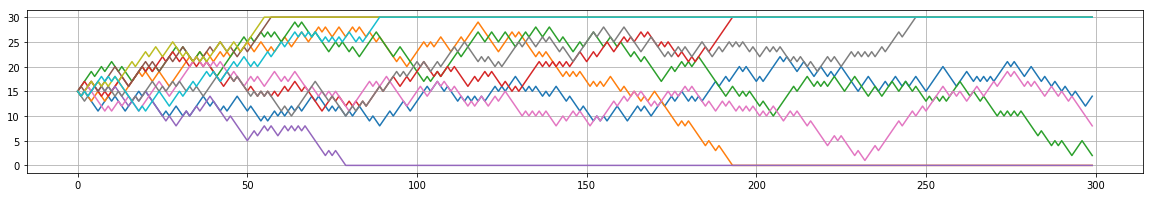

In [31]:
def marche_absorb(n):
    P=np.zeros([n,n])
    for i in range(1,n-1): 
        P[i,i+1]=0.5
        P[i,i-1]=0.5
    P[0,0]=1
    P[-1,-1]=1
    return P


t_max=300
nb_essaies=10
plt.figure(figsize=(20,3))
plt.grid()
n=31
P=marche_absorb(n)
for i in range(nb_essaies):
    X=markov_from_P(t_max,P,n//2)
    plt.plot(range(t_max),X)
    



Faites tourner ce programme en variant les points de départ. Que constatez-vous?

### Calcul exacte de la probabilité d'absorbtion

Considérons la probabilité que la chaine soit absorbée en 0:
$$
\gamma_0(x) = \mathbf P_x[X_\infty=0] = \Gamma_\infty^x(0)
$$

***Lemme:*** Le vecteur (colonne) $\gamma_0$ vérifie $P\gamma_0=\gamma_0$. 

En effet
$$
\begin{aligned}
P\gamma_0(x)& = \sum_y P(x,y) \gamma_0(y) =   \sum_y P(x,y) \mathbf P_y[\lim_n X_n = 0   ]    \\
&= \dots
\end{aligned}
$$
Completez, en n'oubliant pas de justifier les interversions entre limite et espérance. 


Ainsi $\gamma_0$ vérifie les trois propriétés suivantes:

* C'est un vecteur propre à droite de $P$ associé à la valeur propre 1. 
* $\gamma_0(0)=1$.
* $\gamma_0(n-1)=0$. 

***A vous:*** Vous avez tous les ingrédients pour calculer ce $\gamma_0$ explicitement.  Observez le programme ci-dessus. 


***Vocabulaire:*** Dans la théorie des chaines de Markov:

* Les vecteurs lignes sont assimilés à des mesures sur $E$; Par exemple, si $\mu_t$ est la loi de $X_t$ alors qui est: 
$$
\mu_t P = \sum_x  \mu_t(x) P(x,\cdot)
$$

* Les vecteur colonnes sont assimilités a des fonctions. Par exemple, considérons $f$ un vecteur colonne sur $E$. On peut calculer ceci:

$$
Pf(x) = \sum_y P (x,y) f(y) = \mathbf E_x[f(X_1)]
$$

En particulier les vecteurs vérifiant $P\gamma = \gamma$ sont appelées des "fonctions invariantes". 



val_pr
 [-0.707  0.     0.707  1.     1.   ]
vec_pr
 [[ 0.     0.     0.     0.73   0.   ]
 [ 0.5    0.707 -0.5    0.548  0.183]
 [-0.707 -0.    -0.707  0.365  0.365]
 [ 0.5   -0.707 -0.5    0.183  0.548]
 [ 0.     0.     0.     0.     0.73 ]]
f: [0.    0.183 0.365 0.548 0.73 ]
g: [0.73  0.548 0.365 0.183 0.   ]
M
 [[0.   0.73]
 [0.73 0.  ]]


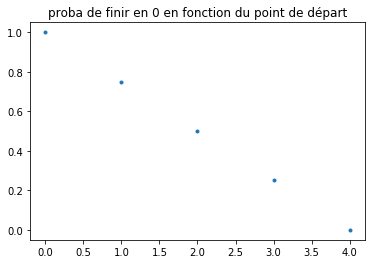

In [32]:
n=5
P=marche_absorb(n)

val_pr,vec_pr=np.linalg.eig(P)
val_pr=np.real(val_pr)
vec_pr=np.real(vec_pr)

""" on voit qu'il y a 2 vecteurs propres associés à la valeur propre 1. 
Attention, ils sont situés à la fin de la matrice!
On les notes f et g"""
print("val_pr\n",val_pr)
print("vec_pr\n",vec_pr)
f=vec_pr[:,-1]
g=vec_pr[:,-2]
print("f:",f)
print("g:",g)

M=np.array([[f[0],g[0]],[f[n-1],g[n-1]]])
print("M\n",M)
ab=np.linalg.inv(M) @ [1,0]
gamma=ab[0]*f+ab[1]*g

plt.plot(range(n),gamma,".")
plt.title("proba de finir en 0 en fonction du point de départ");


Remarquons que la technique que nous avons utilisée marcherait pour n'importe quelle chaine de markov avec 2 points absorbants. N'hésitez pas à en inventez une.

***Exo:*** Le programme précédent n'est pas très robuste car les vecteurs propres  proposés par `np.linalg.eig` sont classés dans un ordre que nous ne maitrisons pas. Modifiez ce programme pour qu'il fonctionne quelle que soit la matrice `P` en entrée. Aide: repérer les indices où les valeurs propres valent 1 à l'aide de la syntaxe `==1`

***Exo (difficile):***  Pour $x,y \in \{0,...,n-2\}$ on a:
$$
\mathbf P_x[X_1=y / X_\infty=0] = \frac{ \mathbf P_x[X_1=y , X_\infty=0]}{\mathbf P_x[X_\infty=0]}
= \frac{ \mathbf P_x[X_1=y , X_\infty \circ \theta_1 =0]}{\gamma_0(x)}
= \frac{ \mathbf P_x[X_1=y ] \mathbf P_y[X_\infty=0]}{\gamma_0(x)}
=\frac{\gamma_0(y)}{\gamma_0(x)} P(x,y)
$$
Essayez d'itérer cette argument pour vérifier que:
$$
\mathbf P_x[X_1=y,X_2=z / X_\infty=0] =\frac{\gamma_0(z)}{\gamma_0(x)} P(x,y)P(y,z)  = \frac{\gamma_0(y)}{\gamma_0(x)} P(x,y)\frac{\gamma_0(z)}{\gamma_0(y)} P(y,z)
$$
ainsi on voit que le processus $X$ conditionné à finir sa vie en $0$ est une chaine de Markov sur $\{0,...,n-2\}$ ayant comme matrice de transition $(x,y) \to \frac{\gamma_0(y)}{\gamma_0(x)} P(x,y)$. 

Imaginez un procéder de simulation pour vérifier cela. Aide: il y a deux étapes:

* Comment simuler un processus conditionnée à finir en 1 point donné.
* Comment estimer le noyaux de transition d'une chaine de Markov à partir de simulations.





## Convergence en loi


### apériodique

***Définition:*** Considérons un graphe irréductible orienté. Il est périodique, de période $n>1$, lorsque tous les boucles qu'on peut faire en suivant les arrête ont une longueur multiple de $n$. 

Remarques:

* Grâce à l'irréductibilité, il suffit de tester les boucles issues d'un état donné. 

* Pour montrez qu'un graphe est apériodique, il suffit de trouver un état $x_0$ est de trouver deux boucles issues de $x_0$ dont le pcgd des longueurs est 1. 


*** Théorème (convergence en loi):*** Considérons une chaine de Markov irréductible apériodique. Alors $(X_t)$ converge en loi vers  l'unique probabilité invariante. 


Il y a une histoire de point fixe derrière ce théorème: Notons $\mu_t$ la loi de $X_t$. On a $\mu_{t+1}= \mu_t P$. Donc si $\mu_t$ converge, il converge nécessairement vers un $\pi$ vérifiant $\pi=\pi P$. 


***A vous:*** Vérifiez que cette convergence en loi équivaut au fait que toutes les lignes de $P^t$ convergent vers $\pi$ quand $t\to \infty$ (j'insiste sur "toutes" les lignes!)

***A vous bis:*** Construisez une chaine de Markov très élémentaire de période 2. Constatez que la convergence en loi ne peut pas fonctionner dans ce cas.



val_pr
 [ 1.    -0.461 -0.461 -0.706  0.313  0.313]
vec_pr
 [[ 0.25   0.26   0.26  -0.403 -0.171 -0.171]
 [ 0.25   0.278  0.278  0.284  0.139  0.139]
 [ 0.076 -0.184 -0.184 -0.464  0.527  0.527]
 [ 0.25  -0.564 -0.564  0.57  -0.544 -0.544]
 [ 0.1    0.113  0.113 -0.323 -0.151 -0.151]
 [ 0.073  0.097  0.097  0.335  0.199  0.199]]


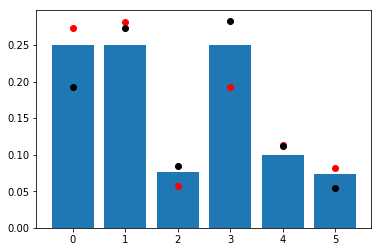

In [37]:
P=premier_chaine()

pi=mesure_invariante(P)
P_infty=np.linalg.matrix_power(P,50)

plt.bar(range(6),pi);
plt.plot(P_infty[0,:],"o",c="red")
plt.plot(P_infty[1,:],"o",c="k");

Avec $t=50$ cela n'a pas encore bien convergé. Essayez avec $t=51$, observez les points rouges et noirs sur la première bare. Comment expliquez-vous cela? (aide: observez le graphe de la chaine)

## Cas infini


### Récurrence/transience

***Définition*** On dit qu'un état est récurrent quand la chaine passe un nombre infini de fois dessus. Sinon l'état est dit transient. Quand une chaine est irréductible, les états sont: ou bien tous récurrents, ou bien tous transients. 


### Classification des chaines de Markov

Notons $dimInv$ la dimension de l'espace vectoriel des mesures invariantes. 

Dans le cas fini nous avions à nous poser les questions dans cet ordre: 

* Réductible $\Rightarrow dimInv\geq 1$
* Irréductible $\Rightarrow dimInv= 1$, une proba inv, théo ergodique
    * pédiodique
    * apériodique $\Rightarrow$ convergence en loi 
    
    
    
Dans le cas infini c'est plus complexe:

* Réductible $\Rightarrow dimInv\geq 1$
* Irréductible

    * Transient $\Rightarrow dimInv\geq 1$, pas de proba inv
    * Récurrent $\Rightarrow dimInv =  1$ 
        
        * Récurrent nul $\Rightarrow$ pas de proba inv
       
        * Récurrent positif $\Rightarrow$ une proba inv, théo ergodique
            * pédiodique
            * apériodique $\Rightarrow$ convergence en loi 
        
            
Le théorème ergodique marche encore dans le cas récurrent-nul. Mais il s'exprime comme ceci:

$$
\lim_{T\to \infty} \frac{ \sum_{t<T}  1_{X_t = x} }{  \sum_{t<T}  1_{X_t = y}  }  = \frac{\pi(x)}{\pi(y)}
$$

Moralement: Dans le cas récurrent nul, la chaine visite si peu souvent les états que $ T \to \sum_{t<T}  1_{X_t = y}$ est négligeable devant $T\to T$. Mais quand quand on fait le rapport de deux négligeables ... 


***Exo:*** Retrouver le théorème ergodique classique à partir de cette version générale. Aide: vous avez uniquement à utiliser le fait que, dans le cas récurrent positif, $\pi$ est de masse fini.  




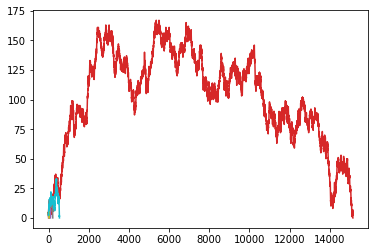

In [34]:
np.random.seed(1234)

nbEssaies=10
for i in range(nbEssaies): 
    Xt=3
    X=[Xt]
    while Xt!=0:
        Xt+=np.random.choice(a=[-1,1])
        X.append(Xt)
    plt.plot(X)
    

Pour quelle raison ce programme est-il risqué pour votre ordinateur? (Notamment si vous comptiez regarder votre série préférée ce soir). Quel est le lien avec la nulle-récurrence? Pour éviter tout problème, j'ai gelé la `seed` du générateur aléatoire. 

## Cas transient


Considérons $t \to X_t$ une chaine de Markov sur $\mathbb Z$. Notons $\mathbf P_x[X \in \cdot]$ sa loi quand elle  démarre en $x$. Supposons que son graphe ait cette allure là:   

![./img/marcheTransiente.png](./img/marcheTransiente.png)


***Exo1:*** Mettez des poids sur les flèches ci-dessus de telle manière que:

$$
\mathbf P_0[\lim_t X_t = +\infty] =\mathbf P_0[\lim_t X_t = -\infty] = \frac 12
$$

Considérons les fonctions:

$$
\begin{align}
\gamma_+(x) &= P_x[\lim_t X_t = +\infty]\\
\gamma_-(x) &= P_x[\lim_t X_t = -\infty]
\end{align}
$$


Vérifiez que ces fonctions vérifient $P\gamma_\pm=\gamma_\pm$ (on a déjà fait cet exo, essayez de le refaire de mémoire). Donnez un argument simple qui indique que ces deux fonctions ne sont pas proportionnelles. On voit ainsi que dimInv est au moins égal à 2. En fait on peut montrer qu'il est exactement égal à 2.  On est en dans situation exactement similaire au cas d'une chaine de Markov finie avec 2 points absorbants, sauf que maintenant, les points absorbants sont... 

En vous inspirant d'un exercice précédent: Comment interpréter une chaine de markov dont la matrice de transition est $(x,y)\to \frac {\gamma_+(y)}{\gamma_+(y)} P(x,y)$?



***Exo2:*** Supposons maintenant que $P(x,x+1) = \frac 3 4$ et $P(x,x-1)=\frac 1 4$. Ainsi on a:

$$
\mathbf P_x[\lim_t X_t = +\infty] = 1
$$

Donc $\gamma_+(x) = 1$ et $\gamma_-(x)=0$, on n'a donc trouver qu'une seule fonction invariante par cette méthode, et c'est la fonction 1 qu'on connaissait bien.   En fait, dans ce cas, toutes les fonctions invariantes bornées sont constantes (cela vous rappelle peut-être un théorème d'analyse complexe!). On est dans une situation simitaire au cas d'une chaine de Markov finie avec 1 point absorbant: $+\infty$. 


Cependant: En essayant de résoudre le $P\gamma=\gamma$ on tombe sur l'équation de récurrence:
$$
\frac 34 \gamma(x+1) - \gamma(x) + \frac 14 \gamma(x-1) 
$$


Dont les solutions sont:

$$
x \to \lambda  + \mu 3^{-x} 
$$

Ainsi on trouve une seconde fonction invariante positive: $x \to 3^{-x}$



Si vous avez mis des poids très très simples, vous devriez trouver une seconde fonction invariante non bornée, de la forme $x \to e^{kx}$ (essayez de résoudre $P\gamma=\gamma$). Cette seconde fonction "correspond" au point $-\infty$. 

On montre que: à chaque direction de fuite possible dans le graphe, correspond une fonction invariante. Si cette direction est 'probable' la fonction est bornée. L'ensemble des directions de fuite est appelé la frontière de Martin.  
* Exemple simple: si le graphe est constitué des 3 copies de $\mathbb N$ recolées en $0$, il y aura 3 fonctions invariantes linéairement indépendantes. 

* Exemple plus complexe:  La marche aléatoire simple dans $\mathbb Z^3$ est transiente. Sa frontière de martin est une sorte de sphère de dimension 2 à l'infini. Ainsi l'ensemble des solutions de  $P\gamma=\gamma$ est de dimension infinie. Et bien sur il en est de même pour les solutions de $\pi P =\pi$.


Retenez surtout que dans le cas où $E$ est infini, il peut y avoir moulte fonctions/mesures invariantes. 